In [1]:
import sys
sys.path.append('../')
import base
import matplotlib.pyplot as plt
import numpy as np

Example of Single Session Data

In [2]:
data = base.BeaconPosition('../../Data/Raw/', '20200206-125706', has_beacon = False, has_metadata = False)

In [3]:
data.statistics

{'avg_speed': 15.17153624826186,
 'median_speed': 10.114459683899474,
 'distance': 254.63314505628495}

Text(0.5, 1.0, 'Speed distribution')

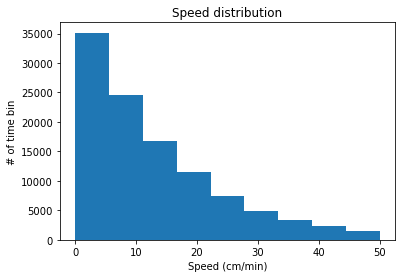

In [5]:
plt.hist(data.speed, bins = np.linspace(0, 50, 10))
plt.xlabel('Speed (cm/min)')
plt.ylabel('# of time bin')
plt.title('Speed distribution')

In [6]:
print(f'total travel distance: {data.travel_distance[-1]} m')

total travel distance: 254.63314505628495 m


Example of multiple sessions

In [7]:
root_paths1 = ['../../Data/Raw/']*8
root_paths2 = ['../../Data/Raw/']*7
tags1 = ['20190923-174441', '20191001-112411', '20191002-115000', \
        '20191106-170809', '20191107-183857', '20191108-145125', \
       '20191118-161325', '20191127-122008']
tags2 = ['20190923-171112', '20191001-115127', '20191002-111038',\
         '20191107-174215', '20191108-142321', '20191118-171209',\
         '20191127-132223']
rat_fs1 = base.MultiDaysBeaconPosition(root_paths1, tags1, has_beacon = False, has_metadata= False)
rat_fs2 = base.MultiDaysBeaconPosition(root_paths2, tags2, has_beacon = False, has_metadata = False)

In [8]:
rat_fs1.multisession_statistics

{'avg_speed': 12.293938090780372,
 'avg_distance': 145.23547337956376,
 'median_speed': 8.46040608747937}

In [9]:
rat_fs2.multisession_statistics

{'avg_speed': 13.499226042363174,
 'avg_distance': 147.1895148289269,
 'median_speed': 8.941953223642383}

In [10]:
rat_fs1.individual_statistics

{'avg_speeds': [5.92239075065854,
  10.15689474064652,
  15.058005670015447,
  11.671315646862327,
  14.095403315837126,
  13.254176469241964,
  13.376908915168555,
  14.816409217812511],
 'distances': [78.75586916233748,
  96.47829055019132,
  94.2600982135423,
  62.21466815795907,
  96.97175071185369,
  87.98249059289309,
  340.34934255558613,
  304.87127709214684],
 'median_speeds': [0.0,
  3.5147070149366098,
  10.722089261923445,
  7.783746374554952,
  10.412238990715169,
  9.731856926152563,
  9.321297986711242,
  10.14549155743059]}

In [11]:
rat_fs2.individual_statistics

{'avg_speeds': [10.995735225716375,
  11.443562547843742,
  16.812182614078257,
  14.44591380615267,
  13.935052598672419,
  13.727631515840534,
  13.134503988238235],
 'distances': [83.73488039605196,
  88.38362637628228,
  103.04385067803669,
  87.29197741531425,
  82.89678661183598,
  339.9635395961344,
  245.01194272883268],
 'median_speeds': [5.295794036967642,
  6.5234924544857815,
  12.14459041534701,
  10.173050124477575,
  9.374183824985598,
  9.115359033428213,
  8.72639659301071]}

Text(0, 0.5, 'm')

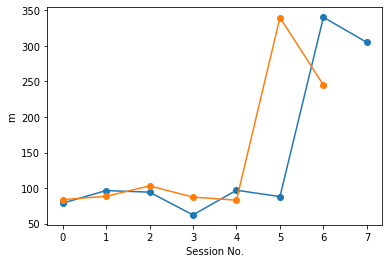

In [12]:
plt.plot(rat_fs1.distance_per_session, '-o', label = 'fs1')
plt.plot(rat_fs2.distance_per_session, '-o', label = 'fs2')
plt.xlabel('Session No.')
plt.ylabel('m')

Parsing trials

In [14]:
data = base.BeaconPosition('../../Data/Raw/FS10/BPositions_FS10_20211006-154014/', '20211006-154014', has_beacon = True, has_metadata = True)

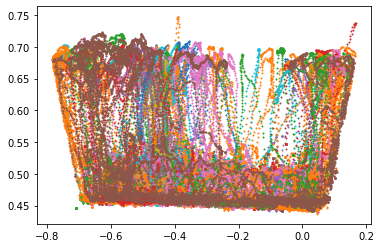

In [15]:
for trial in data.trial_list:
    plt.scatter(trial[:,1], trial[:,2], s=1)
    #plt.scatter(trial[0,1], trial[0,2], s=10, c= 'black')
    #plt.scatter(trial[-1,1], trial[-1,2], s=10, c= 'black')

In [4]:
root_paths = ['../../Data/Raw/FS10/BPositions_FS10_20211006-154014/', '../../Data/Raw/FS10/BPositions_FS10_20211007-150456/',\
             '../../Data/Raw/FS10/BPositions_FS10_20211011-094820/', '../../Data/Raw/FS10/BPositions_FS10_20211014-160224/']
tags = ['20211006-154014','20211007-150456', '20211011-094820', '20211014-160224']
data = base.MultiDaysBeaconPosition(root_paths, tags, has_beacon = True, has_metadata = True)

../base.py:33: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


In [5]:
1/(data.dataset_list[0].position_data[0,0]-data.dataset_list[0].position_data[1,0])

-100.00009536752259

In [24]:
trial = data.trial_list[0][1]
invisible_time=60
time_after = np.cumsum(trial[1:, 0] - trial[:-1, 0])
invisible_end = np.where(time_after >= invisible_time)[0][0]

In [25]:
invisible_end

3583

In [23]:
time_after

array([1.99999809e-02, 2.99999714e-02, 4.99999523e-02, ...,
       1.85530000e+02, 1.85550000e+02, 1.85560000e+02])